# Pricing of GMAB and GMDB

### Question 1

Analytical expressions of the GMAB at time t ≤ T:

 - using call options:

In [29]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd


def call__analytic_opt_price(K1,K2,S,T,t,sigma,r):

    g1 = (np.log(S/K2) + r-0.5*(sigma)**2)*(T-t)/(sigma*np.sqrt(T-t))
    g2 = g1 + (sigma*np.sqrt(T-t))
    d1 = (np.log(S/K1) + (r-0.5*(sigma)**2))*(T-t)/(sigma*np.sqrt(T-t))
    d2 = d1 + (sigma*np.sqrt(T-t))

    spread = K2*(1-norm.cdf(-g1)) + S*((norm.cdf(d1))-(norm.cdf(g1))) - K1*((norm.cdf(d2))-(norm.cdf(g2)))*np.exp(-r*(T-t))

    return spread


- using put opitions: 

In [ ]:
def put__analytic_opt_price(K1,K2,S,T,t,sigma,r):
	pass

### Question 2

Binomial tree to price a GMAB of maturity T=8 years

### Question 3

Analytical expressions of the GMAB at time t ≤ T:

- using call options:

- using put options:

### Question 4

Binomial tree to price a GMDB of maturity T=8 years

97.52703280679253

# Pricing of a maximum return insurance

In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd

### Question 1

From the file "Data_project.xlsx": 

In [77]:
def import_excel(file_path):
    ''' Imports xlxs file in the provided path.'''
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
        
        # Check if the required columns are present
        required_columns = ['Date']
        if not all(column in df.columns for column in required_columns):
            raise ValueError("Required columns are missing in the Excel file.")
        return df

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
    except Exception as e:
        print("An error occurred:", e)

# Import .xlsx file containing date and indexes columns closing values. Example ['Date', "Eurxx50", "Amex"] 
file_path = "/mnt/c/buildbr/finance-stochastic-24/data/Data_project.xlsx" 
data = import_excel(file_path)

In [78]:
def calculate_daily_return(df):
    ''' Calculate the returns, avg, and std for each index-column.'''

    avg_return_idx = []
    std_return_idx = []

    cols = df.columns[1:]

    [col for col in df.columns if 'return' in col]
    for col in cols:
        df[f'return_{col}'] = df[col].pct_change()
        avg_return_idx.append(df[f'return_{col}'].mean())
        std_return_idx.append(df[f'return_{col}'].std())

    return cols, avg_return_idx, std_return_idx

def calculate_returns_corr(df):
    ''' Calculate the return correlation of the indexes.'''

    return_columns = [col for col in df.columns if 'return' in col]
    df_return = df[return_columns]
    return_corr_matrix = df_return.corr()

    correlation = df['return_Amex'].corr(df['return_Eurxx50'])
    cov_matrix = df[return_columns].cov()
    
    return return_corr_matrix, correlation, cov_matrix

if data is not None:
    # Calculate returns
    indexes, avg_returns, std_returns = calculate_daily_return(data)
    # Calculate returns correlation
    corr_matrix, correlation, cov_matrix = calculate_returns_corr(data) # check with slides

- Daily returns of each indice

In [20]:
print(data)

          Date      Eurxx50         Amex  return_Eurxx50  return_Amex
0   2022-02-07  4120.560059  3735.790039             NaN          NaN
1   2022-02-08  4129.250000  3711.939941        0.002109    -0.006384
2   2022-02-09  4204.089844  3733.330078        0.018124     0.005763
3   2022-02-10  4197.069824  3713.290039       -0.001670    -0.005368
4   2022-02-11  4155.229980  3810.250000       -0.009969     0.026112
..         ...          ...          ...             ...          ...
498 2024-01-29  4639.359863  4522.080078        0.000839    -0.002262
499 2024-01-30  4662.700195  4573.000000        0.005031     0.011260
500 2024-01-31  4648.399902  4499.319824       -0.003067    -0.016112
501 2024-02-01  4638.600098  4486.240234       -0.002108    -0.002907
502 2024-02-02  4654.549805  4443.890137        0.003438    -0.009440

[503 rows x 5 columns]


- Averages, standard deviations and correlation of daily returns.

In [92]:
for idx, col in enumerate(indexes):
        print(f'The daiy return average and std deviaton for the {col} are: {round(avg_returns[idx]*100,3)}% and {round(std_returns[idx],3)}')
print(f'The correlation is rho : {round(correlation,3)}')
print(f'The covariance matrix M:')
print(cov_matrix)
print(f'The Choleski decomposition of M:')
np.linalg.cholesky(cov_matrix)

The daiy return average and std deviaton for the Eurxx50 are: 0.032% and 0.012
The daiy return average and std deviaton for the Amex are: 0.046% and 0.015
The correlation is rho : 0.306
The covariance matrix M:
                return_Eurxx50  return_Amex
return_Eurxx50        0.000147     0.000057
return_Amex           0.000057     0.000236
The Choleski decomposition of M:


array([[0.01210911, 0.        ],
       [0.00470035, 0.01462035]])

- Calculate the annual standard deviations, annual returns and covariance
matrix.

In [86]:
for idx, col in enumerate(indexes):
        print(f'The annual return average and std deviaton for the {col} are: {round(avg_returns[idx]*252*100,3)}% and {round(std_returns[idx]* np.sqrt(252),3)}')

The annual return average and std deviaton for the Eurxx50 are: 7.959% and 0.192
The annual return average and std deviaton for the Amex are: 11.686% and 0.244


$$
\text{Cov}(X,Y) = 
\begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_1 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{bmatrix}
$$


In [99]:

cov_matrix_Y = np.array([[std_returns[0]* np.sqrt(252)**2, std_returns[0]* np.sqrt(252)*std_returns[1]* np.sqrt(252)*correlation],
                           [std_returns[0]* np.sqrt(252)*std_returns[1]* np.sqrt(252)*correlation, std_returns[1]* np.sqrt(252)**2]])
print(f'The annualized covariance matrix M:')
print(cov_matrix_Y)


The annualized covariance matrix M:
[[3.05149697 0.01434311]
 [0.01434311 3.87004927]]
The annualized Choleski decomposition of M:
[[1.74685345 0.        ]
 [0.00821083 1.96722695]]


$$
\text{$\Sigma$} = 
\begin{bmatrix}
\sigma_1 & 0 \\
\rho \sigma_2  & \sqrt{1 -\rho} \sigma_2 \\
\end{bmatrix}
$$

In [100]:
print(f'The annualized Choleski decomposition of M:')
Cholesky = np.linalg.cholesky(cov_matrix_Y)
print(Cholesky)

The annualized Choleski decomposition of M:
[[1.74685345 0.        ]
 [0.00821083 1.96722695]]


### Question 2
The interest rate is equal r = 3.75% and the maturity is T. Using the parameters estimated from Q1, evaluate the maximum return insurance with a
closed form expression (present and brifly comment it) for T = 1, 2, ...10 years (t = 0).

In [121]:
def embedded_options_max_return_closed_form_black_scholes(S1, S2, T, choleski):
    """
    Calculate the Black-Scholes option price with an embedded max return feature in a closed form.

    Parameters:
        S1 (float): Current price of the first underlying asset
        S2 (float): Current price of the second underlying asset
        T (float): Time to maturity (in years)
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        float: The Black-Scholes option price with an embedded max return feature
    """
  
    # Calculate the parameters for the option (slide 191)
    ut = -(choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T/2
    vt = np.sqrt((choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T)
    
    # Black-Scholes parameters with max return feature
    d2 = (np.log(S1 / S2) - ut)/vt
    d1 = d2 - vt

    # Analytical formula for the option price 
    option_price = S2 * norm.cdf(-d1) - S1 * norm.cdf(-d2)

    S1T = S1 * np.exp(-r * T)

    return S1T + option_price

Maturities = range(1,10) 

# Example slide 192
S1 = 100     # Current price of the first underlying asset
S2 = 100     # Current price of the second underlying asset
r = 0.04
cho_1 =  np.array([[0.25, 0],
                   [0, 0.3]])

for T in Maturities:
    option_price = embedded_options_max_return_closed_form_black_scholes(S1, S2, T, cho_1)
    print("Embedded Options Max Return Insurance Closed Form (Black-Scholes):", option_price)


# Project
S1 = 15000   # Current price of the first underlying asset
S2 = 15000   # Current price of the second underlying asset
r = 0.0375
cho_2 =  Cholesky

for T in Maturities:
    option_price = embedded_options_max_return_closed_form_black_scholes(S1, S2, T, cho_2)
    print("Embedded Options Max Return Insurance Closed Form (Black-Scholes):", option_price)




Embedded Options Max Return Insurance Closed Form (Black-Scholes): 111.55970875568644
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 114.06712186516529
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 115.17032372984495
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 115.59861630466924
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 115.63338092859473
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 115.4175623534163
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 115.03479473172777
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 114.53843205109685
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 113.96453831846878
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 26608.720334753463
Embedded Options Max Return Insurance Closed Form (Black-Scholes): 27965.32410913433
Embedded Options Max Return Insurance Closed Form (Black

### Question 3
Price the contract by Monte-Carlo simulations for T = 1, 2, ...10 years. Compare your results with those obtained with the closed-form expression. Test different steps of time and check the convergence.

Estimated price of the exchange option: 0.0


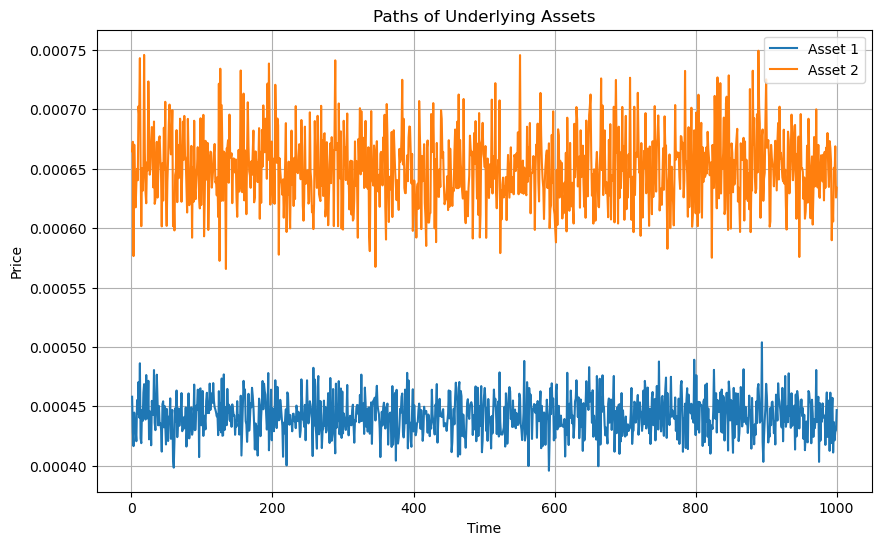

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def exchange_option_price_multi_assets_with_paths(means, std_devs, correlation_matrix, r, T, num_simulations):
    """
    Calculate the price of an exchange option for multiple assets using Cholesky decomposition method and return paths.
    
    Parameters:
        means: array-like
            Array of means for each underlying asset.
        std_devs: array-like
            Array of standard deviations for each underlying asset.
        correlation_matrix: array-like
            Correlation matrix between the underlying assets.
        r: float
            Risk-free interest rate.
        T: float
            Time to expiration.
        num_simulations: int
            Number of simulations.
    
    Returns:
        float
            Estimated price of the exchange option.
        array-like
            Simulated paths of the underlying assets.
    """
    num_assets = len(means)
    
    # Generate correlated standard normal random variables
    L = np.linalg.cholesky(correlation_matrix)
    z = np.random.normal(size=(num_assets, num_simulations))
    correlated_variables = np.dot(L, z)
    
    # Calculate stock prices
    S = np.zeros((num_assets, num_simulations))
    for i in range(num_assets):
        S[i] = means[i] * np.exp((r - 0.5 * std_devs[i]**2) * T + std_devs[i] * np.sqrt(T) * correlated_variables[i])
    
    # Calculate payoffs for each simulation
    payoffs = np.maximum(S[0] - S[1], 0)  # For simplicity, assuming only two assets
    
    # Discounted payoffs
    discounted_payoffs = payoffs * np.exp(-r * T)
    
    # Average the payoffs
    option_price = np.mean(discounted_payoffs)
    
    return option_price, S

# Example usage:
num_simulations = 1000
means = avg_returns
std_devs = std_returns
correlation_matrix = corr_matrix
price, paths = exchange_option_price_multi_assets_with_paths(means, std_devs, correlation_matrix, r, T, num_simulations)

print("Estimated price of the exchange option:", price)

# Plot paths of the underlying assets
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_simulations + 1), paths[0], label='Asset 1')
plt.plot(np.arange(1, num_simulations + 1), paths[1], label='Asset 2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Paths of Underlying Assets')
plt.legend()
plt.grid(True)
plt.show()


### Question 4
We assume that in case of death before expiry, the inheritor will receive the maximum between the initial premium (15 000€) and the funds
tracking the Eurostoxx 50 and the AMEX. Evaluate this death insurance for T = 1, 2, ...10 years, using Monte-Carlo simulations. Test different steps of time and check the convergence.